In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,Reshape, LeakyReLU as LR,Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

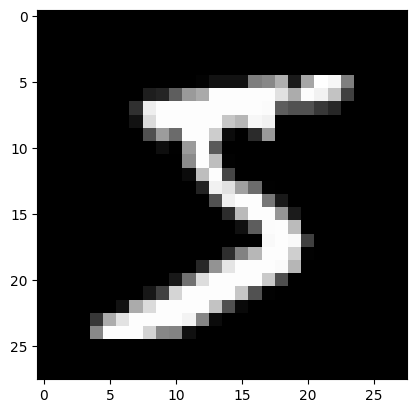

In [3]:
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [4]:
LATENT_SIZE = 32
encoder = Sequential([
Flatten(input_shape = (28, 28)),
Dense(512),
LR(),
Dropout(0.5),
Dense(256),
LR(),
Dropout(0.5),
Dense(128),
LR(),
Dropout(0.5),
Dense(64),
LR(),
Dropout(0.5),
Dense(LATENT_SIZE),
LR()
])

In [6]:
decoder = Sequential([
Dense(64, input_shape = (LATENT_SIZE,)),
LR(),
Dropout(0.5),
Dense(128),
LR(),
Dropout(0.5),
Dense(256),
LR(),
Dropout(0.5),
Dense(512),
LR(),
Dropout(0.5),
Dense(784),
Activation("sigmoid"),
Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy",metrics=['accuracy'])

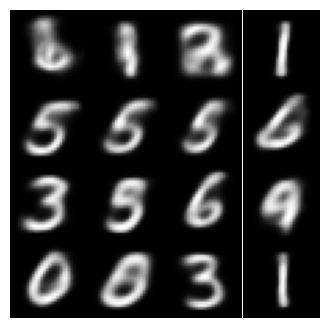

In [12]:
EPOCHS = 60

for epoch in range(EPOCHS):
    print("----------- EPOCH", epoch, "-----------")
    
    # Train one epoch with batches (use verbose=0 to suppress long logs)
    model.fit(x_train, x_train, epochs=1, batch_size=128, verbose=1)
    
    # Generate 16 random test samples in one batch
    rand_idx = np.random.randint(0, 10000, 16)
    rand = x_test[rand_idx]
    
    # Predict all 16 images at once (MUCH faster than 16 separate predicts)
    preds = model.predict(rand, verbose=0)
    
    # Plot results
    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    display.clear_output(wait=True)
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(preds[i * 4 + j], cmap="gray")
            axs[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
  